In [2]:
#不同相关系数，两种投资组合收益率与方差关系
import numpy as np
import operator
from scipy import stats 
import math 
sd_1=0.25
sd_2=0.11
r1=0.17
r2=0.06
w1=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
w2=np.ones(11)-w1
rp=np.dot(r1,w1)+np.dot(r2,w2)  #求取组合收益
r=[0,0.5,1,-0.5,-1]  #相关系数
#求取不同相关系数下的组合标准差
sd_p=np.zeros((11,5)) #11行5列的0集
j=0 #第一个相关系数是0
for j in range(0,5):
    i=0 #当i=0时，w1[i]=w1[0] w2[i]=w2[0] 第一列第一行 100%投资2
    while i<=10: 
        sd_p[i][j]=((w1[i]*sd_1)**2+(w2[i]*sd_2)**2+2*w1[i]*w2[i]*r[j]*sd_1*sd_2)**0.5
        i=i+1 
#一列一列的 固定住相关系数 一共有五个    


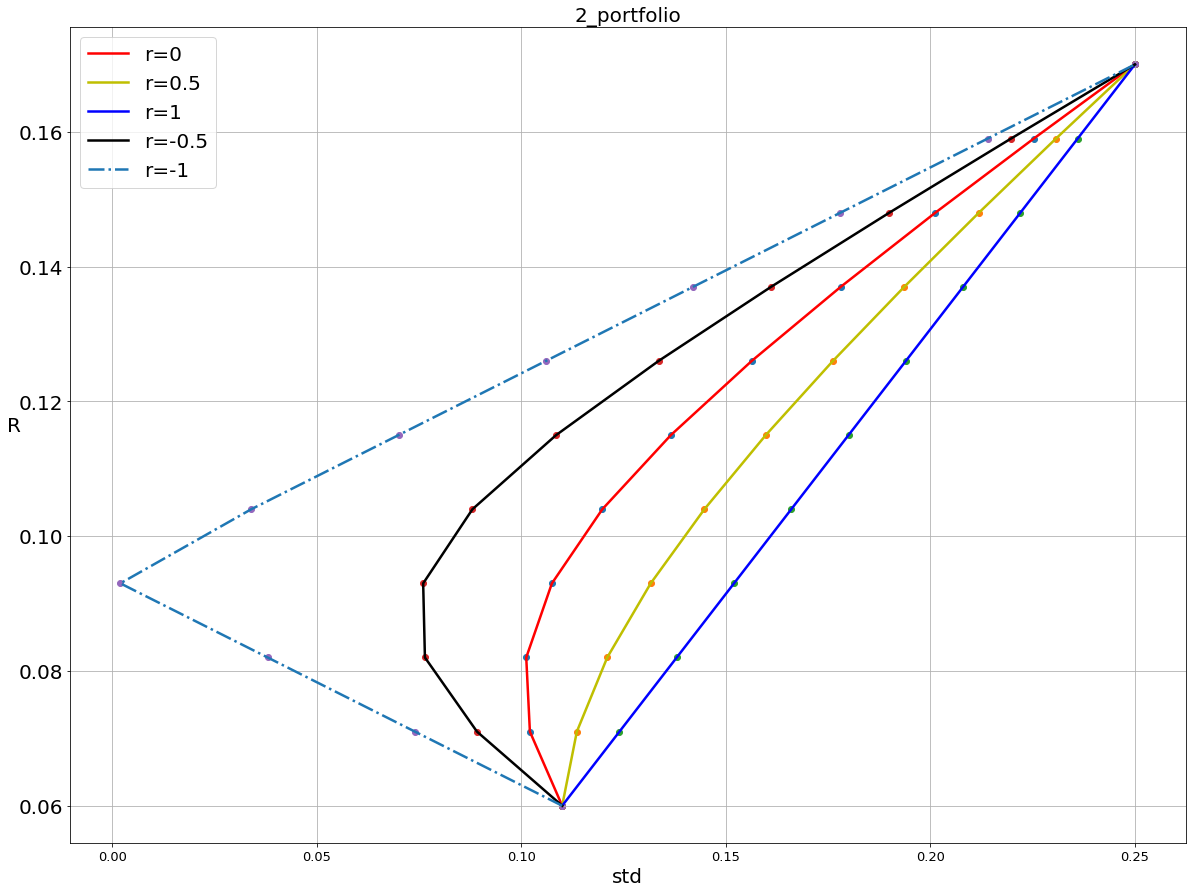

In [3]:
#绘图不同相关系数下，2种投资组合的风险与收益
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

plt.figure(figsize=(20,15))
plt.scatter(sd_p[:,0],rp) #所有的行 第0列 
plt.plot(sd_p[:,0],rp,'r',label='r=0',lw=2.5)
plt.scatter(sd_p[:,1],rp)
plt.plot(sd_p[:,1],rp,'y',label='r=0.5',lw=2.5)
plt.scatter(sd_p[:,2],rp)
plt.plot(sd_p[:,2],rp,'b',label='r=1',lw=2.5)
plt.scatter(sd_p[:,3],rp)
plt.plot(sd_p[:,3],rp,'black',label='r=-0.5',lw=2.5)
plt.scatter(sd_p[:,4],rp)
plt.plot(sd_p[:,4],rp,'-.',label='r=-1',lw=2.5)
plt.xlabel('std',fontsize=20)#标准差（波动率）
plt.xticks(fontsize=13)
plt.ylabel('R',fontsize=20,rotation=0)#收益率 
plt.yticks(fontsize=20)
plt.title('2_portfolio',fontsize=20)#两种投资组合的风险与收益
plt.legend(fontsize=20)
plt.grid('True')
plt.show()  


In [ ]:
1.机会集曲线向左凸出，揭示了风险分散化效应。

　　【提示】相关性对风险的影响
　　（1）相关系数等于1（完全正相关），机会集是一条直线，没有风险分散化效应；
　　（2）相关系数小于1，机会集是一条曲线，相关系数越小，机会集曲线越弯曲，
    风险分散化效应越强（不一定出现无效集）；
　　（3）相关系数足够小，机会集曲线出现比单个最低标准差还低的最小方差组合，
    风险分散效应较明显，机会集出现无效集；
　　（4）相关系数为-1时，机会集曲线变成了一条折线。

　　2.有效集位于机会集的顶部，从最小方差组合点起到最高期望报酬率点止，其余为
    无效集。

    （1）有效集

        a.相同的标准差和较高的期望报酬率；

        b.相同的期望报酬率和较低的标准差。

    （2）无效集

        a.相同的标准差和较低的期望报酬率；

        b.相同的期望报酬率和较高的标准差；

        c.较低报酬率和较高的标准差。

In [2]:
#获取默认路径
import os
print (os.path.abspath('.'))


/Users/stanley/Desktop/python/Brain


In [4]:

#载入需要用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

#绘制股票的投资组合（#绘制指数、股价图）
data=pd.read_excel('/Users//stanley//Desktop//1234.xlsx',header=0,index_col=0)
data.head()


,上海机场,中国医药,万科A,工商银行,杰瑞股份
交易日期,,,,,
2015-01-05,20.53,16.95,14.91,5.06,31.74
2015-01-06,20.09,17.56,14.36,5.10,32.03
2015-01-07,20.18,17.56,14.23,5.04,31.29
2015-01-08,20.00,17.56,13.59,4.83,32.45
2015-01-09,19.95,17.56,13.45,4.88,33.00


<AxesSubplot:xlabel='交易日期'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20132 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/stanley/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text

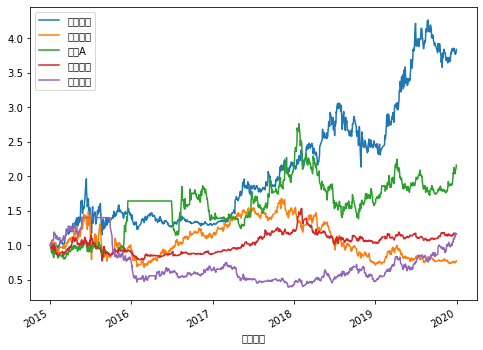

In [4]:
 (data/data.iloc[0]).plot(figsize=(8,6)) #可视化

In [5]:

R=np.log(data/data.shift(1))  #按照对数收益率公式计算对数收益率 shift向下移动 对数收益率公式：=ln(pt/p(t-1))
R=R.dropna()  #删除缺省的数据
R_mean=R.mean()*252   #计算股票的年化平均收益率
print(R_mean)

上海机场    0.278150
中国医药   -0.054099
万科A     0.159168
工商银行    0.031074
杰瑞股份    0.031502
dtype: float64


In [6]:

R_cov=R.cov()*252    #计算协方差矩阵并年化处理
print(R_cov)

          上海机场      中国医药       万科A      工商银行      杰瑞股份
上海机场  0.144361  0.078944  0.044908  0.028727  0.025613
中国医药  0.078944  0.182975  0.048749  0.028237  0.050266
万科A   0.044908  0.048749  0.158865  0.038155  0.014890
工商银行  0.028727  0.028237  0.038155  0.059063  0.010119
杰瑞股份  0.025613  0.050266  0.014890  0.010119  0.182236


In [7]:

R_corr=R.corr()    #计算相关系数矩阵
print(R_corr)

          上海机场      中国医药       万科A      工商银行      杰瑞股份
上海机场  1.000000  0.485732  0.296539  0.311104  0.157916
中国医药  0.485732  1.000000  0.285926  0.271617  0.275272
万科A   0.296539  0.285926  1.000000  0.393893  0.087511
工商银行  0.311104  0.271617  0.393893  1.000000  0.097532
杰瑞股份  0.157916  0.275272  0.087511  0.097532  1.000000


In [8]:

R_vol=R.std()*np.sqrt(252)  #计算股票年化收益率的波动率 = 收益率标准差* n**1/2 n是时间 如果是天 250 252都行 周52 月12
print(R_vol)

上海机场    0.379948
中国医药    0.427755
万科A     0.398578
工商银行    0.243029
杰瑞股份    0.426891
dtype: float64


In [9]:

x=np.random.random(5) #random数字加起来不一定是1 但是加权之后权重相当于1
weights=x/np.sum(x)       #生成和为1的随机数权重矩阵 
print('股票投资组合的权重：',weights)
R_port=np.sum(weights*R_mean)
print('投资组合的预期收益率:',round(R_port,4))
vol_port=np.sqrt(np.dot(weights,np.dot(R_cov,weights.T))) #投资组合标准差 
print('投资组合收益率波动率',round(vol_port,4))


股票投资组合的权重： [0.0140191  0.25588971 0.26352789 0.15708642 0.30947688]
投资组合的预期收益率: 0.0466
投资组合收益率波动率 0.258


In [10]:
weights.sum()

0.9999999999999998

In [11]:
vol_test=np.sqrt(np.dot(weights,np.dot(R_cov,weights.T)))
vol_test

0.2580269931843204

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


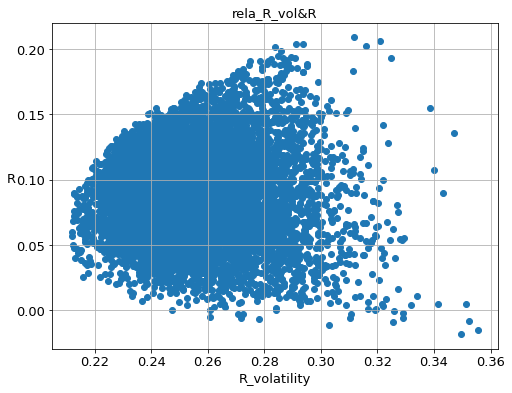

In [12]:
#构造投资组合
Rp_list=[]
Vp_list=[]
for i in np.arange(10000): #重复10000次 即是没有提到 i
    x=np.random.random(5)
    weights=x/sum(x)
    Rp_list.append(np.sum(weights*R_mean)) #收益率
    Vp_list.append(np.sqrt(np.dot(weights,np.dot(R_cov,weights.T)))) #风险 即组合标准差 
    #i +=1
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list) #散点图
plt.xlabel('R_volatility',fontsize=13) #波动率 
plt.xticks(fontsize=13)
plt.ylabel('R',fontsize=13,rotation=0) #收益率
plt.yticks(fontsize=13)
plt.title('rela_R_vol&R',fontsize=13) #投资组合的收益率与波动率的关系 
plt.grid('True')
plt.show()

In [13]:
#构造有效前沿
import scipy.optimize as sco
def f(w):                           #定义最优化求解函数
    w=np.array(w) #权重是一个list
    Rp_opt=np.sum(w*R_mean)        #求取收益率
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov,w.T)))  #求取波动率
    return np.array([Rp_opt,Vp_opt])

def Vmin_f(w):
    return f(w)[1] #返回的是波动率即投资组合的标准差_最小化表示当固定收益率为10%时的风险最小
cons=({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x:f(x)[0]-0.1}) #预期收益率10%
                            #x是权重 权重等于1          #eq函数结果等于零 即f(x)[0]=0.1
bnds=tuple((0,1) for x in range(len(R_mean)))
len(R_mean)*[1.0/len(R_mean),]
result=sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons)      
                            #x0                                         bounds=x边界范围
print('投资组合预期收益率为10%时上海机场的权重',round(result['x'][0],4))
print('投资组合预期收益率为10%时中国医药的权重',round(result['x'][1],4))
print('投资组合预期收益率为10%时万科A的权重',round(result['x'][2],4))
print('投资组合预期收益率为10%时工商银行的权重',round(result['x'][3],4))
print('投资组合预期收益率为10%时杰瑞股份的权重',round(result['x'][4],4)) #R_mean R_cov 是前面已经求好的 只有五个数据且有序


投资组合预期收益率为10%时上海机场的权重 0.2216
投资组合预期收益率为10%时中国医药的权重 0.0
投资组合预期收益率为10%时万科A的权重 0.1102
投资组合预期收益率为10%时工商银行的权重 0.5061
投资组合预期收益率为10%时杰瑞股份的权重 0.1621


In [14]:
bnds #5个（0，1）

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [15]:
result

     fun: 0.21414730509749982
     jac: array([0.25974903, 0.21154906, 0.22966169, 0.19660928, 0.19603415])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.22155513, 0.        , 0.1101986 , 0.50613127, 0.162115  ])

In [16]:
len(R_mean)*[1.0/len(R_mean)] #x0 = 5*[1/5]=..

[0.2, 0.2, 0.2, 0.2, 0.2]

In [ ]:
非凸函数的 非线性规划（求极值），scipy.optimize.minimize的使用方法
函数参数：
scipy.optimize.minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
解释：
fun: 求最小值的目标函数
x0:变量的初始猜测值，如果有多个变量，需要给每个变量一个初始猜测值。minimize是局部最优的解法
method:求极值的方法，官方文档给了很多种。一般使用默认。每种方法我理解是计算误差，反向传播的方式不同而已，这块有很大理论研究空间
constraints:约束条件，针对fun中为参数的部分进行约束限制

eq表示 函数结果等于0 ； ineq 表示 表达式大于等于0
bounds=x边界范围

In [17]:

#求取波动率的最小值，对应的收益率
cons_vmin=({'type':'eq','fun':lambda x:np.sum(x)-1}) #权重总和是1
result_vmin=sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_vmin)
Rp_vmin=np.sum(R_mean*result_vmin['x']) #每个投资组合的均值*权重
Vp_vmin=result_vmin['fun'] #波动率 
print('波动率在可行性集是全局最小值时的投资组合的预期收益率',round(Rp_vmin,4))
print('在可行集是全局最小的波动率',round(Vp_vmin,4))

波动率在可行性集是全局最小值时的投资组合的预期收益率 0.0669
在可行集是全局最小的波动率 0.2104


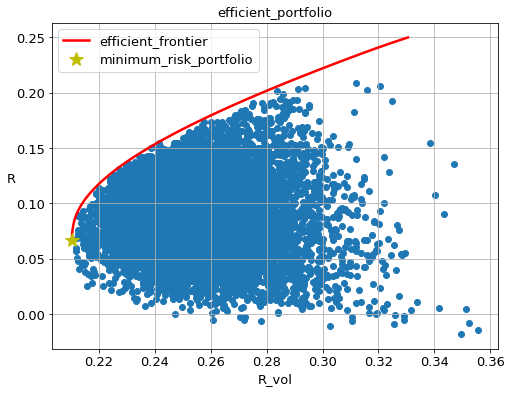

In [18]:
#有效前言的可视化
Rp_target=np.linspace(Rp_vmin,0.25,100) #收益率 !!这里限制了图像只能在上半段！！ R_min,0.25
Vp_target=[] #波动率（投资组合的标准差）
for r in Rp_target:                       #权重和等于1                       收益率是r
    cons_new=({'type':'eq','fun':lambda x:np.sum(x)-1},{'type':'eq','fun':lambda x:f(x)[0]-r})
    result_new=sco.minimize(Vmin_f,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_new)
    Vp_target.append(result_new['fun'])# 不同的投资组合的标准差（波动率）
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,'r-',label=u'efficient_frontier',lw=2.5) #波动率所对应的收益率散点
plt.plot(Vp_vmin,Rp_vmin,'y*',label=u'minimum_risk_portfolio',markersize=14) 
plt.xlabel(u'R_vol',fontsize=13)
plt.ylabel(u'R',fontsize=13,rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'efficient_portfolio',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

In [ ]:
【资本市场线与CAPM模型】

In [ ]:
提纲：https://mp.weixin.qq.com/s?__biz=MzI1NDUyMTY5Ng==&mid=2247483783&idx=1&sn=57a66506ddbf1839b445e1760f00b6ad&chksm=e9c2b988deb5309e52d15f8e4c61f974145499daec962c6e5b393ce024e70fd7c4f51c365ffa&scene=178&cur_album_id=1340069159761297410#rd
资本市场线为什么是直线：https://www.zhihu.com/question/32075338


In [26]:

#构造资本市场线
def F(w):
    Rf=0.03  #假定无风险利率为3%
    w=np.array(w)
    Rp_opt=np.sum(w*R_mean)
    Vp_opt=np.sqrt(np.dot(w,np.dot(R_cov,w.T)))
    SR=(Rp_opt-Rf)/Vp_opt
    return np.array([Rp_opt,Vp_opt,SR])
def SRmin_F(w):
    return -F(w)[2]
cons_SR=({'type':'eq','fun':lambda x:np.sum(x)-1})
result_SR=sco.minimize(SRmin_F,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_SR)
Rf=0.03
slope=-result_SR['fun']
Rm=np.sum(R_mean*result_SR['x'])
Vm=(Rm-Rf)/slope
print('市场组合的预期收益率',round(Rm,4))
print('市场组合的波动率',round(Vm,4))

市场组合的预期收益率 0.2564
市场组合的波动率 0.3394


In [24]:
#改的 字母没那么难受
import scipy.optimize as sco
def F(w):
    rf=0.03  #假定无风险利率为3%。   #下面的m要等最小话之后才成立， 设立时m字母没有意义 
    w=np.array(w)
    Rm=np.sum(w*R_mean) #无风险与风险组合的最佳组合点M的收益
    Vm=np.sqrt(np.dot(w,np.dot(R_cov,w.T))) #无风险与风险组合的最佳组合点M的波动率（标准差）
    SR=(Rm-rf)/Vm    #资本市场线CML（CAL）的斜率 SR=(Rp-rf)/Vm 这里是因为当P=M时，刚好要相切 SR  Sharpe Ratio 夏普比例 
    #CML下面公式的右边
    
    return np.array([Rm,Vm,SR])
def SRmin_F(w):
    return -F(w)[2]
cons_SR=({'type':'eq','fun':lambda x:np.sum(x)-1}) #权重和为1 
result_SR=sco.minimize(SRmin_F,len(R_mean)*[1.0/len(R_mean),],method='SLSQP',bounds=bnds,constraints=cons_SR)
rf=0.03       #最小化一个负数 即斜率最大话（向上相切最大）
slope=-result_SR['fun'] #上面 SRmin_F返回的是负的 ！！注意这里要把他变回正数  fun！！要看定义的是什么 
Rp=np.sum(R_mean*result_SR['x']) #Rp 当在M点时， Rp即Rm 即m点的预计收益率      ！！  这里result_SR返回的是SR 所以fun 是SR
Vp=(Rp-rf)/slope                 #Vp 当在M点时，Vp即Vm  即m点的波动率 （公式CML下面）  
print('市场组合的预期收益率',round(Rp,4))
print('市场组合的波动率',round(Vp,4))

市场组合的预期收益率 0.2564
市场组合的波动率 0.3394


In [25]:
result_SR

     fun: -0.6672344746104981
     jac: array([-0.08842442,  0.58487225, -0.08830784,  0.08484574,  0.04423074])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.17443345e-01, 0.00000000e+00, 1.82556655e-01, 0.00000000e+00,
       2.80808363e-17])

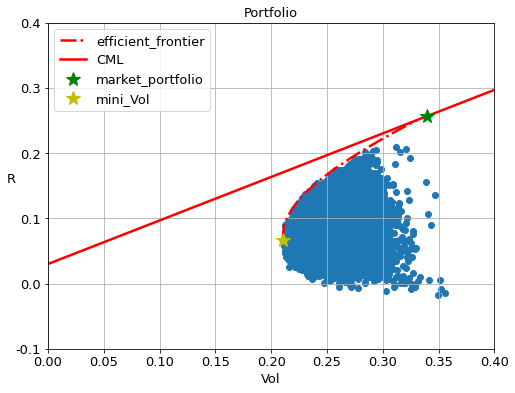

In [30]:
#投资组合资本市场线可视化
Rp_cml=np.linspace(0.03,0.3)
Vp_cml=(Rp_cml-rf)/slope
plt.figure(figsize=(8,6))
plt.scatter(Vp_list,Rp_list)
plt.plot(Vp_target,Rp_target,'r-.',label=u'efficient_frontier',lw=2.5)
plt.plot(Vp_cml,Rp_cml,'r-',label=u'CML',lw=2.5)
plt.plot(Vm,Rm,'g*',label=u'market_portfolio',markersize=14) #CML与有效前沿相切的点
plt.plot(Vp_vmin,Rp_vmin,'y*',label=u'mini_Vol',markersize=14) #最小波动率点 
plt.xlabel(u'Vol',fontsize=13)
plt.ylabel(u'R',fontsize=13,rotation=0)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(0.0,0.4)
plt.ylim(-0.1,0.4)
plt.title(u'Portfolio',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()   

In [24]:
Rp_cml=np.linspace(0.03,0.3)
Rp_cml

array([0.03      , 0.0355102 , 0.04102041, 0.04653061, 0.05204082,
       0.05755102, 0.06306122, 0.06857143, 0.07408163, 0.07959184,
       0.08510204, 0.09061224, 0.09612245, 0.10163265, 0.10714286,
       0.11265306, 0.11816327, 0.12367347, 0.12918367, 0.13469388,
       0.14020408, 0.14571429, 0.15122449, 0.15673469, 0.1622449 ,
       0.1677551 , 0.17326531, 0.17877551, 0.18428571, 0.18979592,
       0.19530612, 0.20081633, 0.20632653, 0.21183673, 0.21734694,
       0.22285714, 0.22836735, 0.23387755, 0.23938776, 0.24489796,
       0.25040816, 0.25591837, 0.26142857, 0.26693878, 0.27244898,
       0.27795918, 0.28346939, 0.28897959, 0.2944898 , 0.3       ])

In [39]:

#载入函数库及数据
import numpy as np 
import pandas as pd  
sz_index=pd.read_excel('/Users//stanley//Desktop//上证指数.xlsx',header=0,index_col=0)
sz_index_log=np.log(sz_index/sz_index.shift(1))  #对数收益率
sz_index_log=sz_index_log.dropna()  #删除缺省的数据
sh_airport=pd.read_excel('/Users//stanley//Desktop//上海机场.xlsx',header=0,index_col=0)
sh_airport_log=np.log(sh_airport/sh_airport.shift(1))  #对数收益率
sh_airport_log=sh_airport_log.dropna()  #删除缺省的数据
ret_merge=pd.merge(pd.DataFrame(sz_index_log),pd.DataFrame(sh_airport_log),left_index=True,right_index=True,how='inner')  #组合数据
ret_merge.columns=['sz_index_log','sh_airport_log'] #更改列名
ret_merge

,sz_index_log,sh_airport_log
交易日期,,
2015-01-06,0.000277,-0.021665
2015-01-07,0.006693,0.004470
2015-01-08,-0.024148,-0.008960
2015-01-09,-0.002445,-0.002503
2015-01-12,-0.017222,-0.024868
...,...,...
2019-12-25,-0.000268,-0.002961
2019-12-26,0.008507,0.003475
2019-12-27,-0.000771,-0.007479


In [40]:
#计算日无风险利率  
Rf_year=0.04 #以2019年中国三年期国债年化收益率为无风险利率  
Rf=(1+Rf_year)**(1/365)-1 #年利率转化为日利率  
#计算风险溢价:Ri-Rf  
Eret=ret_merge-Rf  
Eret.head()  

,sz_index_log,sh_airport_log
交易日期,,
2015-01-06,0.000169,-0.021773
2015-01-07,0.006586,0.004362
2015-01-08,-0.024255,-0.009067
2015-01-09,-0.002553,-0.002611
2015-01-12,-0.017329,-0.024976


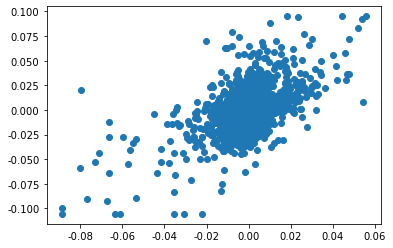

In [45]:
#画出两个风险溢价的散点图，查看相关性  
import matplotlib.pyplot as plt
plt.scatter(Eret.values[:,0],Eret.values[:,1])
plt.show()

In [43]:

# 利用最小二乘法进行线性回归，拟合CAPM模型  
import statsmodels.api as sm  
md_capm=sm.OLS(Eret.sh_airport_log[1:],sm.add_constant(Eret.sz_index_log[1:]))  
result=md_capm.fit()  #获得拟合结果
result.summary()  
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         sh_airport_log   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     617.2
Date:                Sat, 26 Dec 2020   Prob (F-statistic):          1.66e-110
Time:                        17:01:15   Log-Likelihood:                 3065.9
No. Observations:                1217   AIC:                            -6128.
Df Residuals:                    1215   BIC:                            -6118.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0012      0.001      2.120   

In [ ]:
statsmodels.OLS 的输入有 (endog, exog, missing, hasconst) 四个，我们现在只考虑前两个。
第一个输入 endog 是回归中的反应变量（也称因变量），是上面模型中的 y(t), 输入是一个长度为 k 的 array。
第二个输入 exog 则是回归变量（也称自变量）的值，即模型中的x1(t),…,xn(t)。
自变量输入要使用：sm.add_constant()
